CREATED: 2021-12-22 \
What % of all proteins are specific (separately species and genus) \
How many specific genes are there 
  * on average
  * min
  * max
  * standard deviation
  * histogram
  * quartiles \

For each species:
  * how many genes are specific - both count and percentage
  * top 10
  * bottom 10

In [1]:
import json
from pprint import pprint

try:
    metadata_file = open("../data/metadata.json", "r")
except FileNotFoundError:
    print("\033[91m\n" + "No metadata file found, aborting" + "\n\033[0m")

try:
    trg_file = open("../large_data/trg.json", "r")
except FileNotFoundError:
    print("\033[91m\n" + "No trg file found, aborting" + "\n\033[0m")
metadata = json.load(metadata_file)
specific_genes_data = json.load(trg_file)

metadata_file.close()
trg_file.close()


Total number of genomes: 45555
Total number of genes: 147769736

In [2]:
total_genomes = len(metadata)
print(total_genomes)
total_genes = 0
for genome in metadata:
    total_genes += metadata[genome]["protein_count"]
print(total_genes)


45555
147769736


Total genes specific to species: 4150013
Total genes specific to genus: 2638854

In [3]:
total_genes_specific_to_species = 0
total_genes_specific_to_genus = 0
for genome in specific_genes_data:
    for gene in specific_genes_data[genome]:
        if gene[1] == 1:
            total_genes_specific_to_species += 1
        elif gene[1] == 0:
            total_genes_specific_to_genus += 1
        else:
            print("error")
print(total_genes_specific_to_species)
print(total_genes_specific_to_genus)


4150013
2638854


Average number of genes: 3243.7654703106136 \
Average number of species-specific genes: 91.09895730435737 \
Average number of genus-specific genes: 57.92676983865657 \
\
Average percentage of genes that are species-specific: 2.8084323030799756 \
Average percentage of genes that are genus-specific: 1.7857878557758267 

In [4]:
print(total_genes / total_genomes)
print(total_genes_specific_to_species / total_genomes)
print(total_genes_specific_to_genus / total_genomes)

print((total_genes_specific_to_species / total_genes) * 100)
print((total_genes_specific_to_genus / total_genes) * 100)


3243.7654703106136
91.09895730435737
57.92676983865657
2.8084323030799756
1.7857878557758267


In [5]:
count_specific_for_each_genome = dict()
count_values_genus = list()
count_values_species = list()
for genome in specific_genes_data:
    genomes_protein_count = metadata[genome]["protein_count"]
    count_specific_for_each_genome[genome] = {
        "genus": 0,
        "species": 0,
        "protein_count": genomes_protein_count,
    }
    for gene in specific_genes_data[genome]:
        if gene[1] == 1:
            count_specific_for_each_genome[genome]["species"] += 1
        elif gene[1] == 0:
            count_specific_for_each_genome[genome]["genus"] += 1

    genomes_species_total = count_specific_for_each_genome[genome]["species"]
    genomes_genus_total = count_specific_for_each_genome[genome]["genus"]
    count_specific_for_each_genome[genome]["genus_percentage"] = (
        genomes_genus_total / genomes_protein_count
    ) * 100
    count_specific_for_each_genome[genome]["species_percentage"] = (
        genomes_species_total / genomes_protein_count
    ) * 100
    count_values_genus.append(genomes_genus_total)
    count_values_species.append(genomes_species_total)

print(count_specific_for_each_genome["GB_GCA_003218535.1"])


{'genus': 56, 'species': 140, 'protein_count': 2963, 'genus_percentage': 1.889976375295309, 'species_percentage': 4.724940938238272}


Min number of species specific genes: 0 \
Min number of genus specific genes: 0 \
Max number of species specific genes: 4951 \
Max number of genus specific genes: 2211 \

In [6]:
print(
    min(count_values_species),
    min(count_values_genus),
    max(count_values_species),
    max(count_values_genus),
)


0 0 4951 2211


No genomes with no species or genus specific genus - they were not included in trg.json

In [7]:
print(total_genomes)
print(len(count_specific_for_each_genome))
for genome in count_specific_for_each_genome:
    if (
        count_specific_for_each_genome[genome]["genus"] == 0
        and count_specific_for_each_genome[genome]["species"] == 0
    ):
        raise ValueError


45555
45544


Add zeroes to lists until their length equalts total genomes

In [8]:
while len(count_values_species) < total_genomes:
    count_values_species.append(0)
while len(count_values_genus) < total_genomes:
    count_values_genus.append(0)

print(len(count_values_genus))
print(len(count_values_species))
print(total_genomes)


45555
45555
45555


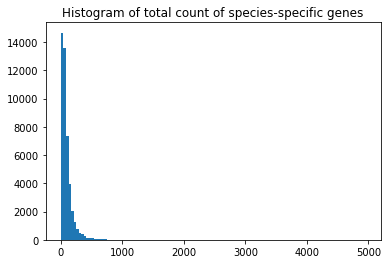

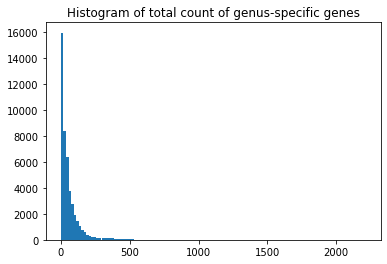

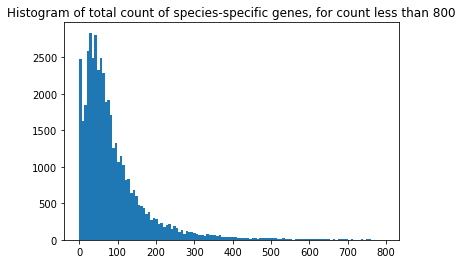

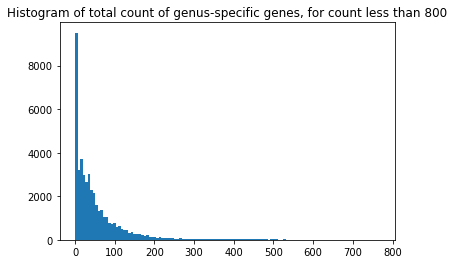

In [9]:
from matplotlib import pyplot as plt

plt.hist(count_values_species, bins=120)
plt.title("Histogram of total count of species-specific genes")
plt.show()
plt.hist(count_values_genus, bins=120)
plt.title("Histogram of total count of genus-specific genes")
plt.show()

plt.hist([x for x in count_values_species if x < 800], bins=120)
plt.title("Histogram of total count of species-specific genes, for count less than 800")
plt.show()
plt.hist([x for x in count_values_genus if x < 800], bins=120)
plt.title("Histogram of total count of genus-specific genes, for count less than 800")
plt.show()


Number of genomes with no specific genes:
* no species specific: 250
* no genus specific: 6978
* no both at the same time: 11

In [10]:
print(count_values_species.count(0))
print(count_values_genus.count(0))

print(total_genomes - len(count_specific_for_each_genome))


250
6978
11


Standard deviation:
* species: 105.21635912768656
* genus: 81.91432620050345

In [11]:
import statistics

print(statistics.pstdev(count_values_species))
print(statistics.pstdev(count_values_genus))


105.21635912768656
81.91432620050345


Median:
* species: 63
* genus: 33

In [12]:
print(statistics.median(count_values_species))
print(statistics.median(count_values_genus))


63
33


Quantiles

* Q1 species :  34.0
* Q2 species :  63.0
* Q3 species :  113.0
* Q1 genus :  10.0
* Q2 genus :  33.0
* Q3 genus :  72.0

In [13]:
import numpy as np

print("Q1 species : ", np.quantile(count_values_species, 0.25))
print("Q2 species : ", np.quantile(count_values_species, 0.50))
print("Q3 species : ", np.quantile(count_values_species, 0.75))

print("Q1 genus : ", np.quantile(count_values_genus, 0.25))
print("Q2 genus : ", np.quantile(count_values_genus, 0.50))
print("Q3 genus : ", np.quantile(count_values_genus, 0.75))


Q1 species :  34.0
Q2 species :  63.0
Q3 species :  113.0
Q1 genus :  10.0
Q2 genus :  33.0
Q3 genus :  72.0


Top 10 - percentage

In [14]:
genus_percentages = list()
species_percentages = list()
for name in count_specific_for_each_genome:
    genus_percentages.append(
        [name, count_specific_for_each_genome[name]["genus_percentage"]]
    )
    species_percentages.append(
        [name, count_specific_for_each_genome[name]["species_percentage"]]
    )
genus_percentages.sort(key=lambda x: -x[1])
species_percentages.sort(key=lambda x: -x[1])
print("Top 10 genus")
pprint(genus_percentages[:10])
print("Top 10 species")
pprint(species_percentages[:10])


Top 10 genus
[['RS_GCF_000200735.1', 72.7214786488209],
 ['RS_GCF_000238995.1', 69.03553299492386],
 ['RS_GCF_003339775.1', 47.964669738863286],
 ['RS_GCF_001886855.1', 47.156726768377254],
 ['RS_GCF_001645765.1', 38.770281810418446],
 ['RS_GCF_005222125.1', 32.80055594162613],
 ['RS_GCF_000012225.1', 30.0],
 ['GB_GCA_000009845.1', 27.30125523012552],
 ['RS_GCF_000565195.1', 26.835043409629044],
 ['RS_GCF_003265155.1', 26.626323751891075]]
Top 10 species
[['GB_GCA_002591725.1', 63.8235294117647],
 ['GB_GCA_902712995.1', 62.52115059221658],
 ['GB_GCA_002238905.1', 60.42090970807875],
 ['GB_GCA_002685535.1', 59.03183498271134],
 ['RS_GCF_000281235.1', 58.15109343936382],
 ['GB_GCA_002325765.1', 52.118644067796616],
 ['RS_GCF_900380265.1', 49.898305084745765],
 ['GB_GCA_003963225.1', 45.49340933380834],
 ['RS_GCF_000179035.2', 43.87990762124711],
 ['RS_GCF_900538055.1', 43.6684896928902]]


Top 10 - count

In [15]:
genus_counts = list()
species_counts = list()
for name in count_specific_for_each_genome:
    genus_counts.append([name, count_specific_for_each_genome[name]["genus"]])
    species_counts.append([name, count_specific_for_each_genome[name]["species"]])
genus_counts.sort(key=lambda x: -x[1])
species_counts.sort(key=lambda x: -x[1])
print("Top 10 genus")
pprint(genus_counts[:10])
print("Top 10 species")
pprint(species_counts[:10])


Top 10 genus
[['GB_GCA_000715635.1', 2211],
 ['GB_GCA_007858575.1', 1683],
 ['GB_GCA_000715615.1', 1642],
 ['GB_GCA_000715605.1', 1523],
 ['RS_GCF_003339775.1', 1249],
 ['GB_GCA_003248315.1', 1155],
 ['RS_GCF_000200735.1', 1141],
 ['RS_GCF_001886855.1', 1020],
 ['RS_GCF_004010275.1', 939],
 ['RS_GCF_001647025.1', 846]]
Top 10 species
[['GB_GCA_002685535.1', 4951],
 ['GB_GCA_000715855.1', 3532],
 ['RS_GCF_001499735.1', 2878],
 ['GB_GCA_000715635.1', 2740],
 ['GB_GCA_000715825.1', 2535],
 ['GB_GCA_002591725.1', 1953],
 ['GB_GCA_001312805.1', 1833],
 ['RS_GCF_000178855.1', 1635],
 ['GB_GCA_003154095.1', 1607],
 ['GB_GCA_000715615.1', 1560]]


add iio data

In [16]:
for genome in metadata:
    try:
        count_specific_for_each_genome[genome]

    except KeyError:
        count_specific_for_each_genome[genome] = {
            "iio": metadata[genome]["iio"],
            "lineage": metadata[genome]["lineage"],
            "protein_count": metadata[genome]["protein_count"],
            "genus": 0,
            "genus_percentage": 0,
            "species": 0,
            "species_percentage": 0,
        }
    else:
        count_specific_for_each_genome[genome]["iio"] = metadata[genome]["iio"]
        count_specific_for_each_genome[genome]["lineage"] = metadata[genome]["lineage"]

pprint(count_specific_for_each_genome["GB_GCA_003218535.1"])


{'genus': 56,
 'genus_percentage': 1.889976375295309,
 'iio': {'genus': {'max': 4.7376200000000015,
                   'mean': 2.72895873135476,
                   'median': 2.7182100000000005,
                   'min': 0.24510999999999997,
                   'std': 0.35021050815387184},
         'species': {'max': 4.7376200000000015,
                     'mean': 2.7271349631206925,
                     'median': 2.7178550000000006,
                     'min': 0.10661000000000001,
                     'std': 0.35657719769831997}},
 'lineage': ['Bacteria',
             'Verrucomicrobiota',
             'Verrucomicrobiae',
             'Chthoniobacterales',
             'UBA10450',
             'Udaeobacter',
             'Udaeobacter sp003218535'],
 'protein_count': 2963,
 'species': 140,
 'species_percentage': 4.724940938238272}


In [17]:
sum = 0
for x in count_specific_for_each_genome:
    try:
        count_specific_for_each_genome[x]["protein_count"]
    except KeyError:
        pprint(count_specific_for_each_genome[x])
        break
        sum += 1

print(sum)


0


In [18]:
import csv

csv_list = list()
for genome in count_specific_for_each_genome:
    csv_list.append(
        {
            "domain": count_specific_for_each_genome[genome]["lineage"][0],
            "phylum": count_specific_for_each_genome[genome]["lineage"][1],
            "class": count_specific_for_each_genome[genome]["lineage"][2],
            "order": count_specific_for_each_genome[genome]["lineage"][3],
            "family": count_specific_for_each_genome[genome]["lineage"][4],
            "genus": count_specific_for_each_genome[genome]["lineage"][5],
            "species": count_specific_for_each_genome[genome]["lineage"][6],
            "protein_count": count_specific_for_each_genome[genome]["protein_count"],
            "genus_count": count_specific_for_each_genome[genome]["genus"],
            "genus_percentage": count_specific_for_each_genome[genome][
                "genus_percentage"
            ],
            "species_count": count_specific_for_each_genome[genome]["species"],
            "species_percentage": count_specific_for_each_genome[genome][
                "species_percentage"
            ],
        }
    )
csv_columns = [
    "domain",
    "phylum",
    "class",
    "order",
    "family",
    "genus",
    "species",
    "protein_count",
    "genus_count",
    "genus_percentage",
    "species_count",
    "species_percentage",
]

csv_file = "specific_genes.csv"
try:
    with open(csv_file, "w") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns, delimiter=";")
        writer.writeheader()
        for data in csv_list:
            writer.writerow(data)
except IOError:
    print("I/O error")


IIO scatterplots - remake lists to make sure the order is correct

In [61]:
perc_genus_specific = list()
perc_species_specific = list()
iio_genus_min = list()
iio_genus_median = list()
iio_species_min = list()
iio_species_median = list()
prot_count = list()
species_count = list()
genus_count = list()
for genome in count_specific_for_each_genome:
    gn = count_specific_for_each_genome[genome]
    prot_count.append(gn["protein_count"])
    species_count.append(gn["species"])
    genus_count.append(gn["genus"])
    perc_genus_specific.append(gn["genus_percentage"])
    perc_species_specific.append(gn["species_percentage"])
    iio_genus_min.append(gn["iio"]["genus"]["min"])
    iio_genus_median.append(gn["iio"]["genus"]["median"])
    iio_species_min.append(gn["iio"]["species"]["min"])
    iio_species_median.append(gn["iio"]["species"]["median"])


In [43]:
from matplotlib.pyplot import figure

def scatter(x, y, title, xlab, ylab):
    plt.scatter(x, y, alpha=0.1)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.gcf().set_size_inches(15, 10)
    plt.show()


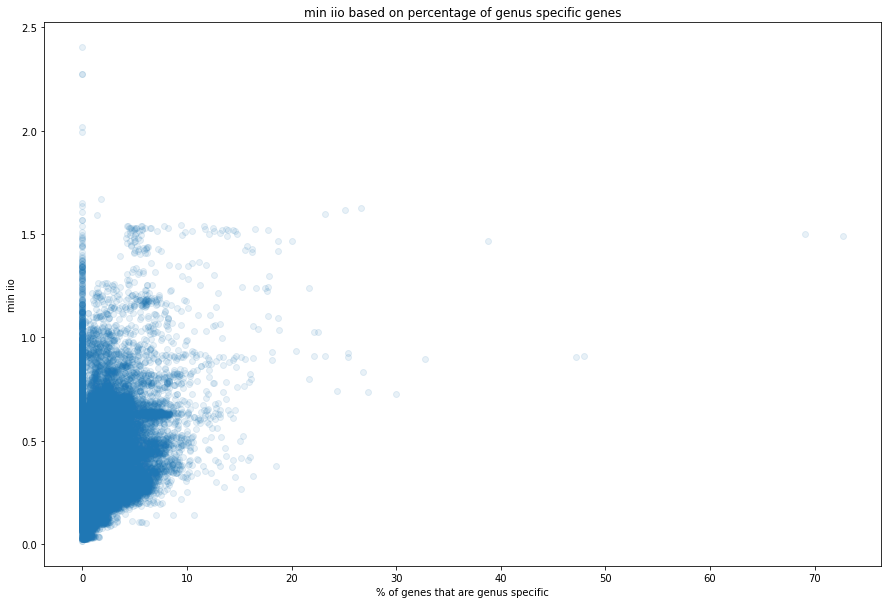

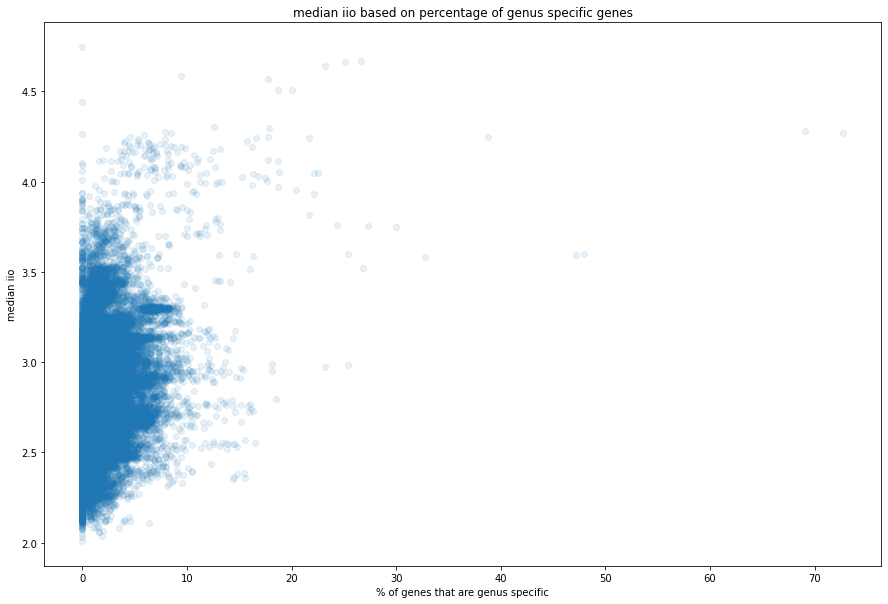

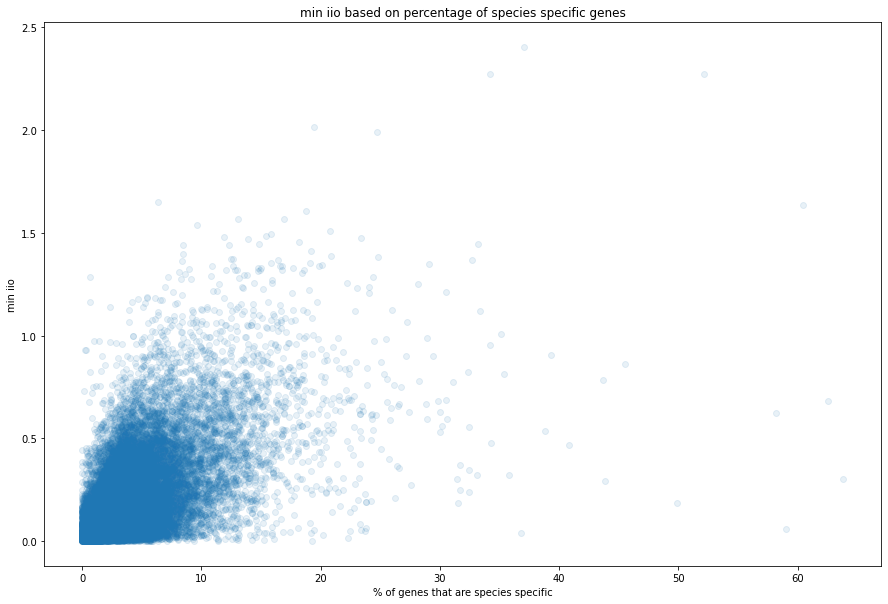

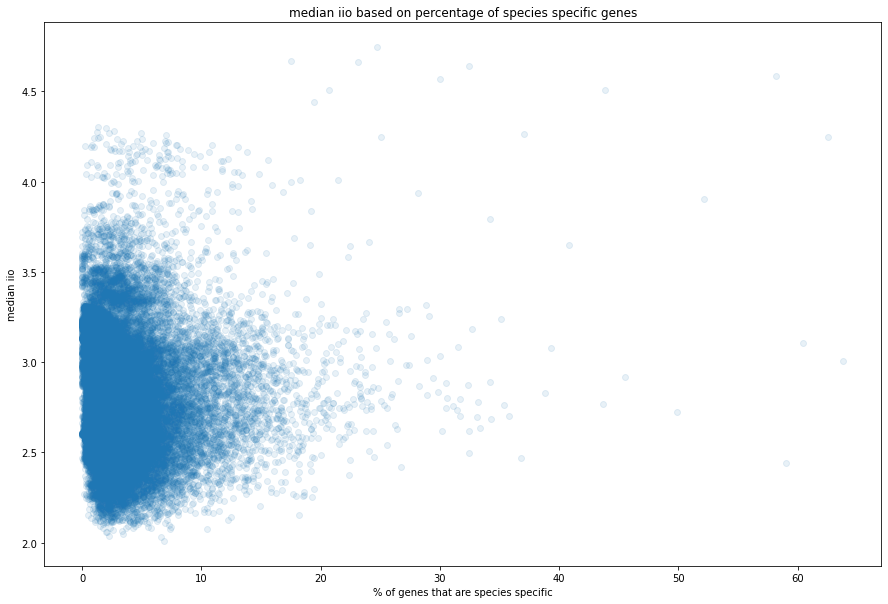

In [44]:
scatter(
    perc_genus_specific,
    iio_genus_min,
    "min iio based on percentage of genus specific genes",
    "% of genes that are genus specific",
    "min iio",
)
scatter(
    perc_genus_specific,
    iio_genus_median,
    "median iio based on percentage of genus specific genes",
    "% of genes that are genus specific",
    "median iio",
)
scatter(
    perc_species_specific,
    iio_species_min,
    "min iio based on percentage of species specific genes",
    "% of genes that are species specific",
    "min iio",
)
scatter(
    perc_species_specific,
    iio_species_median,
    "median iio based on percentage of species specific genes",
    "% of genes that are species specific",
    "median iio",
)

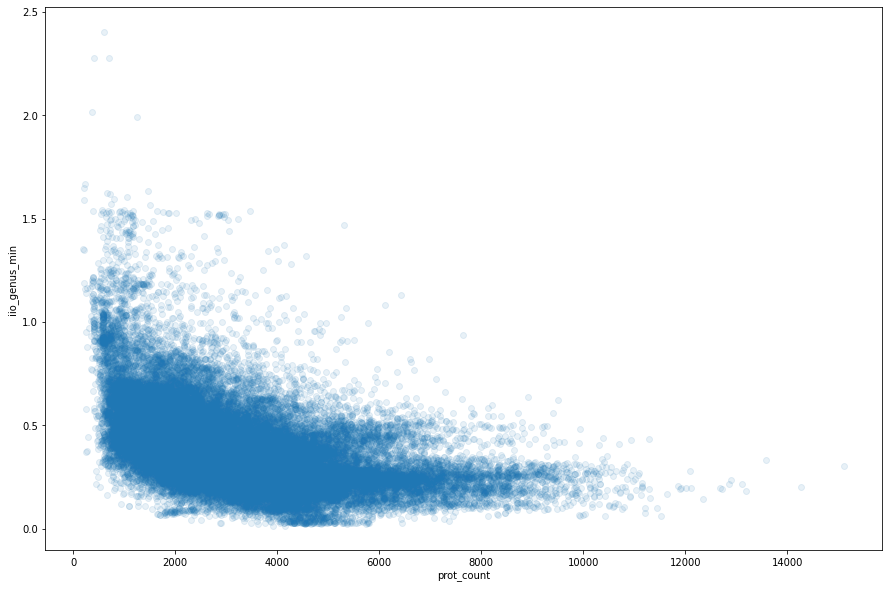

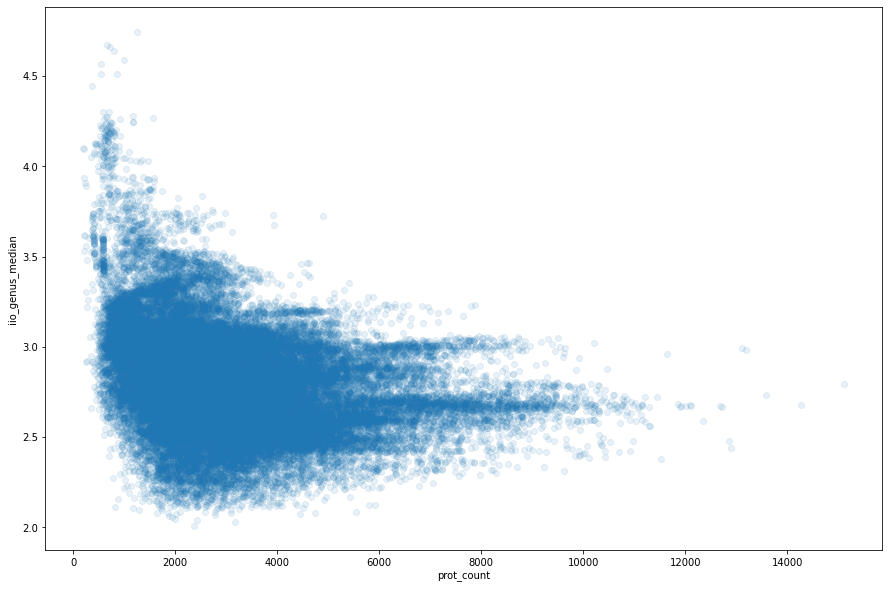

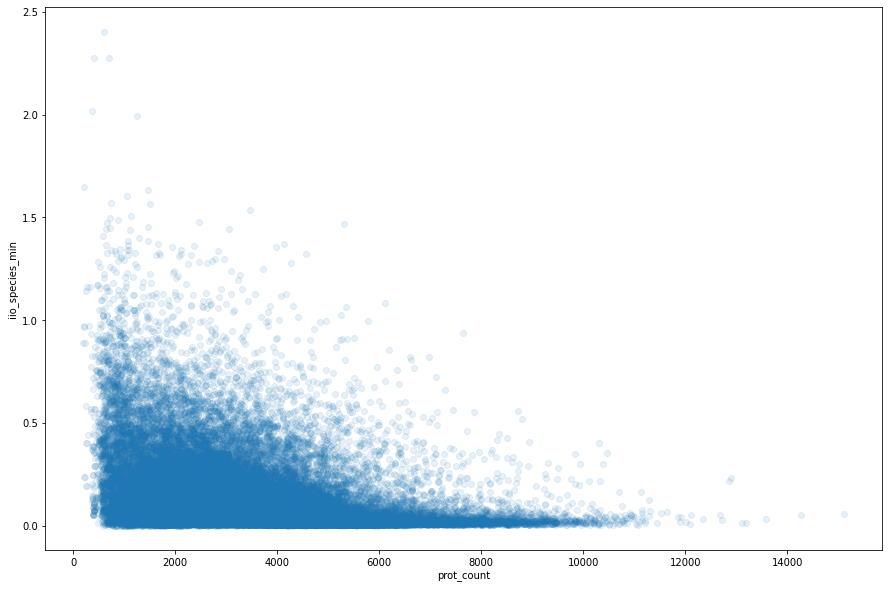

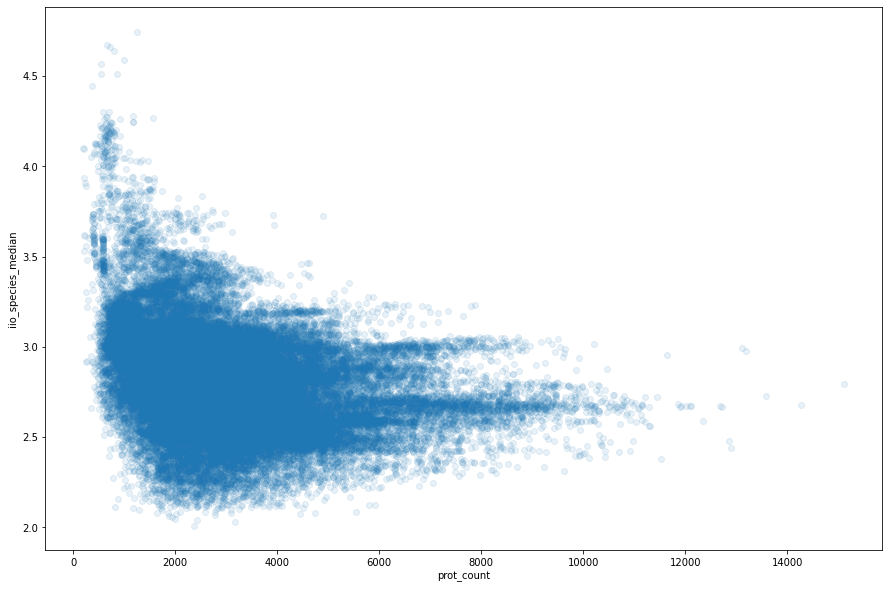

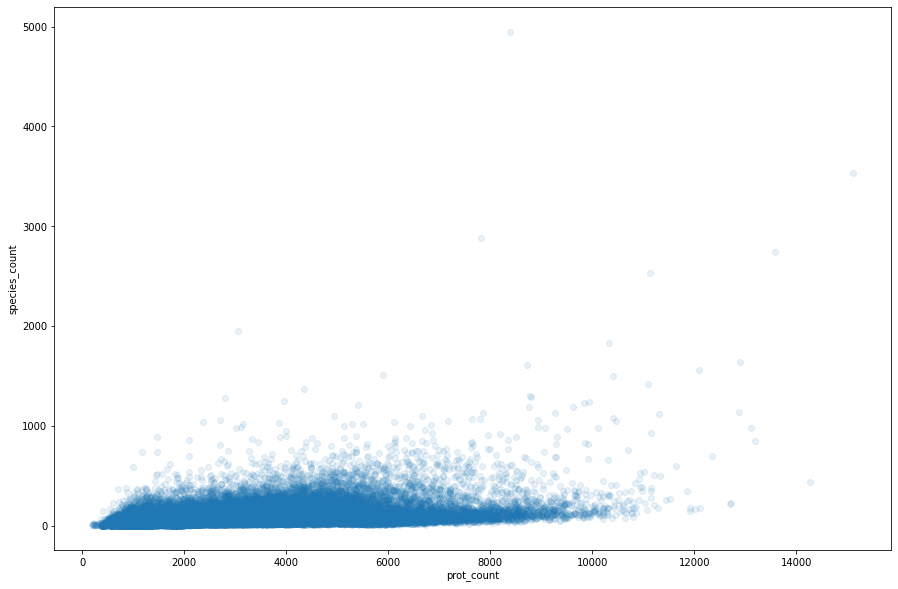

In [62]:

scatter(
    prot_count,
    iio_genus_min,
    "",
    "protein count",
    "iio genus min",
)
scatter(
    prot_count,
    iio_genus_median,
    "",
    "protein count",
    "iio genus median",
)
scatter(
    prot_count,
    iio_species_min,
    "",
    "protein count",
    "iio species min",
)
scatter(
    prot_count,
    iio_species_median,
    "",
    "protein count",
    "iio species median",
)
scatter(
    prot_count,
    species_count,
    "",
    "protein count",
    "species specific genes count",
)
scatter(
    prot_count,
    genus_count,
    "",
    "protein count",
    "genus specific genes count",
)